# Ejercicio 1
¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?
Una de las formas utilizadas para encontrar la funcion de una matriz se basa en el método propuesto por Vidyasagar que utiliza simplemente los valores propios de una matriz cuadrada para encontrar el exponencial de dicha matriz, y generalizarlo para cualquier funcion que admita una expansión en serie de Taylor. Para iniciar podemos enunciar el teorema de Cayley-Hamilton que
sera la base de los desarrollos a utilizar:

Teorema de Cayley-Hamilton: Supongamos que $V$ es un espacio vectorial complejo y que $T$ $\in$ $L(V)$. Sea $p(\lambda_{i})=det(T-\lambda_{i}I)$ el polinomio caracteristico de $p(T)=0$.
Tomamos una matriz cuadrada no-degenerada de dimension N, A. Su polinomio caracteristico se puede escribir como:
$$p(\lambda)=\sum^N_{n=0}\alpha'_{n}\lambda^{n}=0,    \alpha'_{N}=1$$
Al apalicar el Teorema de Cayley-Hamilton para la matriz A resulta
$$p(A)=\sum^N_{n=0}\alpha'_{n}A^{n}=\sum^{N-1}_{n=0}\alpha'_{n}A^{n}+A^{N}=0$$
Lo que nos permite escribir la N-ésima potencia de la matriz A como
$$A^{N}=\sum^{N-1}_{n=0}\alpha_{n}A^{n}$$
donde $\alpha_{j}=-\alpha'_{j}$. Ahora para encontrar potencias de orden superior a N, tenemos que
$$A^{N+1}=AA^{N}$$
$$=\alpha_{0}A+\alpha_{1}A^{2}+...+\alpha_{N-2}A^{N-1}\alpha_{N-1}A^{N}$$
$$=\sum^{N-2}_{n=0}\alpha_{n}A^{n+1}+\alpha_{N-1}\sum^{N-1}_{n=0}\alpha_{n}A^{n}=\sum^{N-1}_{n=0}\beta^{(1)}_{n}A^{n}$$
Siguiendo para $A^{N+m}$ con $m=2,3,...$ se puede llegar por induccion a la ecuacion
$$A^{N+m}=\sum^{N-1}_{n=0}\beta^{(m)}_{n}A^{n}$$    $\forall{m}\geq0$
donde la constante ${\beta^{(m)}_{n}}$, con $n=0,1,....,N-1$, son funciones de las constantes ${\alpha_{j}}$ con $j=0,1,....,N$ $\beta^{(m)}_{n}=\beta^{(m)}_{n}(\alpha_{0},.....,\alpha_{N})$.
Por lo que para encontrar la función de una matriz cuadrada, A, es necesario que dicha función sea bien comportada y admita un desarrollo en serie de potencias. Entonces utilizando el hecho de que la $N+m-ésima$ potencia de una matriz cuadrada de dimension $N,m\geq0$, puede ser escrita como una suma finita de potencias inferiores a $N$ de la misma matriz, por lo tanto podemos escribir el desarrollo en serie de McLaurin de dicha matriz como
$$f(A)=\sum^{\infty}_{n=0}c'_{n}A^{n}=\sum^{N-1}_{n=0}c'_{n}A^{n}+c'_{N}A^{N}+\sum^{\infty}_{m=1}c'_{N+m}A^{N+m}$$
$$=\sum^{N-1}_{n=0}c'_{n}A^{n}+c'_{N}\sum^{N-1}_{n=0}\alpha_{n}A^{n}$$
$$+\sum^{\infty}_{m=1}\sum^{N-1}_{n=0}c'_{N+m}+\beta^{(m)}_{n}A^{n}=\sum^{N-1}_{n=0}c_{n}A^{n}$$
Siguiendo los mismos pasos realizados sobre la matriz A, y que nos lleven a los resultados de las ecuiones anteriores, pero reemplazando A por cada uno de sus valores propios $\lambda_{i}$, se obtiene que
$$f(\lambda_{i})=\sum^{N-1}_{n=0}c_{n}\lambda^{n}_{i}$$
$$\vec c=V^{T^{-1}}\vec f(\lambda)$$
Conociendo los coeficientes $c_{i}$, podemos entonces hallar la función $f(A)$. Con esto observmos que es irrelevante la forma de las constantes ${\beta^{(m)}_{n}}$. Para encontrar la funcion de una matriz cuadrada no-degenerada solamente se deben conocer los valores propios de dicha matriz.

# Ejercicio 2

¿Como se define una matriz simétrica?

Una matriz cuadrada $A$ $\in$ $M_{n}(F)$ se llama simétrica si coincide con su transpuesta:
$$A^{T}=A$$


# Ejercicio 3
¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?
Sea A una matriz cuadrada, esta se puede descomponer en suma de parte simétrica y antisimétrica de la siguiente forma:
$$A=\frac{1}{2}(A+A^{T})+\frac{1}{2}(A-A^{T})$$
donde la parte simetrica es
$$\frac{1}{2}(A+A^{T})$$
Demostración
Se utilizan las propiedades de la transposición
$$(\frac{1}{2}(A+A^{T}))^{T}=\frac{1}{2}((A+A^{T}))^{T}=\frac{1}{2}(A^{T}+(A^{T})^T)$$
$$=\frac{1}{2}(A^{T}+A)=\frac{1}{2}(A+A^{T})$$
Por lo tanto queda demostrado por definición que $\frac{1}{2}(A+A^{T})$ es simetrica, siendo esta la forma de construir una matriz simetrica a partir de cualquier matriz cuadrada.

# Ejercicio 4
Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$

Grafique la trayectoria en el espacio de fase.
Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.


In [1]:
#Sea A una matriz cuadrada de 2x2
A=[-1 1; -1 -1] 

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [2]:
#Con linspace damos un intervalo para el tiempo
t=linspace(0,10,1000);

In [3]:
#Este programa calcula el propagaodr e^At para cada tiempo con una condicion inicial Xo
function propagador(list,Xo)
    vals=eigvals(A)
    w=eigvecs(A)
    X=((w*diagm(exp.(vals*t[1]))*w')*Xo)'
    listX=[]
    push!(listX,X)
    for i in 2:length(list)
       X=((w*diagm(exp.(vals*t[i]))*w')*Xo)'
        push!(listX,X) 
        end
    return listX
end

propagador (generic function with 1 method)

In [4]:
#Se calcula el propagador para cada tiempo y con una conicion incial [0,1]
p=propagador(t,[0,1]);

In [5]:
#Con la función map se localiza el punto de la soclución para x en el conjunto p
listX=map(x->x[1],p);

In [6]:
#Con la función map se localiza el punto de la soclución para y en el conjunto p
listY=map(x->x[2],p);

In [7]:
using PyPlot

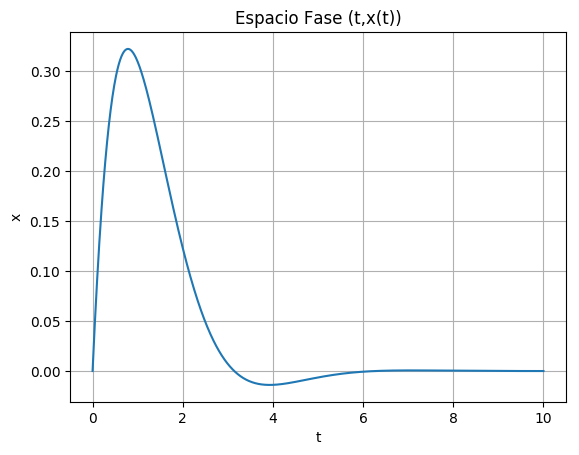

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c271a21d0>

In [8]:
xlabel("t")
ylabel("x")
title("Espacio Fase (t,x(t))")
grid("on")
plot(t,listX) #Gráfica de la función solucion x(t) 

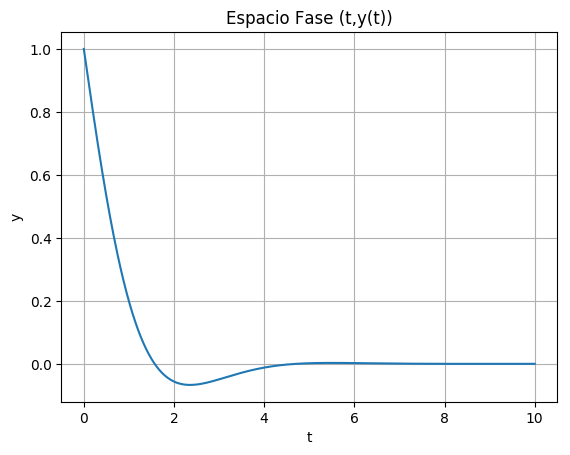

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c27061250>

In [9]:
xlabel("t")
ylabel("y")
title("Espacio Fase (t,y(t))")
grid("on")
plot(t,listY) #Gráfica de la función solucion y(t) 

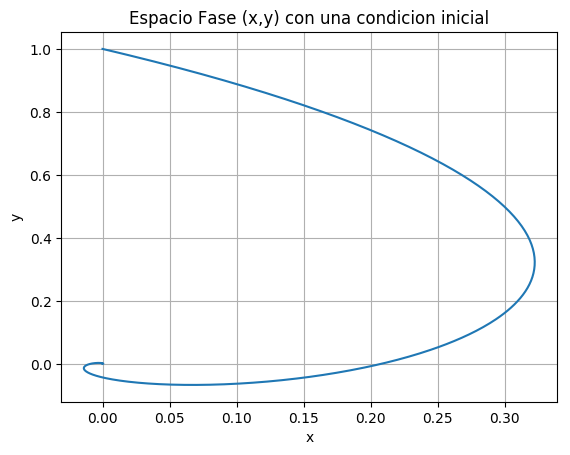

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c26fa8690>

In [10]:
xlabel("x")
ylabel("y")
title("Espacio Fase (x,y) con una condicion inicial")
grid("on")
plot(listX,listY) #Gráfica del Espacio Fase con una condición incial

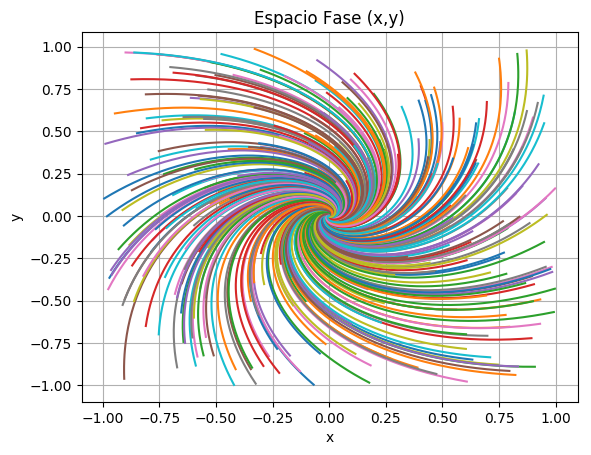

In [11]:
list=linspace(0.5,1,1000)
for i in 1:300
    ci=2*rand(2,1)-1
    p=propagador(list,ci)
     xlabel("x")
    ylabel("y")
title("Espacio Fase (x,y)")
     grid("on")
    plot(map(x->x[1],p),map(x->x[2],p)) #Grafica del espacio fase con condiciones iniciales aleatorias
end